In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

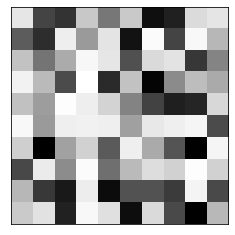

In [13]:
adj = np.random.random([10,10])
fig, ax = plt.subplots()
# ax.colorbar('Greys')
ax.imshow(adj, 'Greys')
ax.set_xticklabels([]),ax.set_yticklabels([])
ax.set_xticks([]),ax.set_yticks([])
plt.show()

In [ ]:
plt.figure(dpi=120)
x = range(0,100)
y = np.random.random(100)
plt.plot(x, y, color='red',  label='random(x)')
plt.legend() #绘制图例
plt.xlabel('x')
plt.ylabel('f(x)')

In [16]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False) 

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    # ax.spines[:].set_visible(False)
    ax.spines['top'].set_visible(False) #去掉上边框
    ax.spines['bottom'].set_visible(False) #去掉下边框
    ax.spines['left'].set_visible(False) #去掉左边框
    ax.spines['right'].set_visible(False) #去掉右边框


    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [ ]:
fig, ax = plt.subplots(dpi = 200)
data = np.random.random([2,10])
im = ax.imshow(data, cmap = 'viridis')

In [ ]:
import seaborn as sns
uniform_data = np.random.randn(2, 12)
ax = sns.heatmap(uniform_data, center=0, cmap="YlGnBu")


In [ ]:
p = [1,2,3]
for i in range(3) :
    p[i] = 'c'+str(i)
p

In [ ]:
signal = np.random.randn(2,12)
cam = np.random.randn(2,12)
chn_num = signal.shape[0]
# channel = np.reshape(np.arange(1, chn_num+1), [-1,1])
channel = list(range(1, chn_num+1))
for i in range(1, chn_num+1):
    channel[i-1] = 'c'+ str(i)
time = np.arange(1,signal.shape[1]+1)
time = np.reshape(time, [1,signal.shape[1]])

# signal = np.expand_dims(signal, axis=0)
# cam = np.expand_dims(cam, axis=0)
# time = np.expand_dims(time, axis=0)
data = np.concatenate((signal, cam),axis=0)
df = pd.DataFrame(data=data.T, columns = pd.MultiIndex.from_product([['signal', 'cam'], channel]))
df['time'] = time.T.astype(np.float16)
df
# data

In [ ]:
['c1','c2']
aa = df['signal','c1'].values
aa = np.reshape(aa, (12,1))
aa

In [ ]:
x= np.linspace(0.5,11.5,12)
x

In [ ]:
a = np.reshape(df['cam','c1'].values, (1,12))
ax = sns.heatmap(a, center=0, cmap="YlGnBu", yticklabels=['c1'])
a = np.reshape(df['cam','c2'].values, (1,12))
ax3 = sns.heatmap(a, center=0, cmap="YlGnBu", yticklabels=['c2'])
ax3 = ax.twinx()
ax2 = ax.twinx()
ax2 = sns.lineplot(x= np.linspace(0.5,11.5,12), y = 'c1',data=df['signal'], color='red', sort=False)
plt.ylim(-3,3)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, dpi = 200)
a = np.reshape(df['cam','c1'].values, (1,12))
ax11 = sns.heatmap(a, center=0, cmap="YlGnBu", yticklabels=['c1'])
ax12 = sns.lineplot(x= np.linspace(0.5,11.5,12), y = 'c1',data=df['signal'], color='red', sort=False)
ax12 = ax11.twinx()
ax1.imshow(ax11)
ax1.imshow(ax12)

a = np.reshape(df['cam','c2'].values, (1,12))
ax2 = sns.heatmap(a, center=0, cmap="YlGnBu", yticklabels=['c2'])
ax21 = ax2.twinx()
ax21 = sns.lineplot(x= np.linspace(0.5,11.5,12), y = 'c2',data=df['signal'], color='red', sort=False)
plt.ylim(-3,3)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
fig = plt.figure() 
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], 
                    xticklabels=[], ylim=(-3, 3)) 
ax1.set(ylabel='c1')
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], 
                    ylim=(-3, 3))
a = np.reshape(df['cam','c1'].values, (1,12))
im = ax1.imshow(a, cmap = 'seismic', aspect='auto',extent=(0,12,-3,3),interpolation= 'bilinear')
ax1.plot(np.linspace(0.5,11.5,12), df['signal','c1'], color = 'green')

im = ax2.imshow(a, cmap = 'seismic', aspect='auto',extent=(0,12,-3,3))
ax2.plot(np.linspace(0.5,11.5,12), df['signal','c1'], color = 'green')
plt.show()

In [8]:
def line_heatmap(y_line, y_heat, y_name, fig, i):
    """
        用于画折线-热力图
        y_line,y_heat 为 np.array, shape = [-1] or [1,-1]
    """
    ylim=(-3, 3) # -3,3 根据情况还得改
    ax1 = fig.add_axes([0.1, 0.1+i*0.4, 0.8, 0.4], 
                    xticklabels=[], ylim=ylim) 
    ax1.set(ylabel='c{0}'.format(i))

    y_heat = np.reshape(y_heat,(1,-1))
    y_line = np.reshape(y_line,(-1,1))
    im = ax1.imshow(y_heat, cmap = 'viridis', aspect='auto',extent=(0,y_heat.shape[1],ylim[0],ylim[1]),interpolation= 'bilinear')
    lens = y_heat.shape[1]
    ax1.plot(np.linspace(0.5,lens-0.5,lens), y_line, color = 'red')
    # ax1.spines['bottom'].set_visible(False) #去掉下边框
    ax1.set_xticks([])

In [ ]:
fig = plt.figure() 
for i in range(4):
    signal = np.random.randn(1,22)
    cam = np.random.randn(1,22)
    line_heatmap(y_line=signal, y_heat=cam, y_name='c{0}'.format(i), fig=fig, i=i)
plt.show()

# 实际操作

In [2]:
import numpy as np
from scipy.io import loadmat

In [14]:
data = np.load('E:\\DATABASE\\FirstGNN\\signal\\signal.npy',  allow_pickle=True)
n_data = data[0, 0]
# for j in range(n_data.shape[0]): # 分类数目
    # n1 = n_data[j, 0] 

In [6]:
type(data)

numpy.ndarray

In [ ]:
data

In [8]:
data2 = np.load('E:\\DATABASE\\FirstGNN\\CT\\CT-GNN-5.npz',allow_pickle=True)

# cam = data2['cam_list']
# cam.shape

In [9]:
cam = data2['n_cam_list']

In [10]:
cam[0].shape

(18, 128)

In [11]:
label_list = data2['label_list']

In [7]:
a = np.array([1,2])
b = np.array([3,4])
np.concatenate((a,b),axis = 0) 

array([1, 2, 3, 4])

In [12]:
cam[0].shape, cam[1].shape

((18, 128), (18, 128))

In [15]:
for j in range(1):#n_data.shape[0]): # 分类数目
    n1 = n_data[j,0] # 1-level
    for k in range(1):#n1.shape[0]):
        n11 = n1[k,0] # 2-level
        fig = plt.figure()
        for i in range(1):# n11.shape[0]): 
            dn = n11[i,0] # 某一行信号
            it = int(i+k*n1.shape[0]+j*n_data.shape[0])
            cam = np.concatenate((cam[it], cam[it+1],cam[it+2]),axis = 0)
            line_heatmap(y_line=dn, y_heat=cam, y_name='c{0}'.format(i), fig=fig, i=i)
        plt.savefig('E:\\DATABASE\\FirstGNN\\line-heat\\test.png')

NameError: name 'line_heatmap' is not defined

<Figure size 432x288 with 0 Axes>

# signal

In [2]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
rd = np.random.randn(1,200)
data = np.random.randint(17, 25, size=[1,200])
data = data+rd

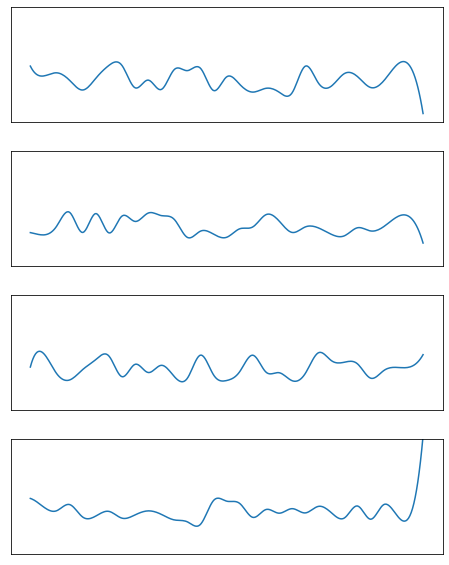

In [17]:
fig = plt.figure() 
for i in range(4):
    rd = np.random.rand(30)
    data = np.random.randint(2, 3, size=30)
    data = data+rd
    xnew = np.linspace(0,30,300)

    datas = make_interp_spline(range(30), data, k=3)(xnew)
    # plt.plot(xnew, datas, "C2o-", markevery = 1, mec = "1.")
    ylim=(1, 5) # -3,3 根据情况还得改
    ax1 = fig.add_axes([0.1, 0.1+i*0.5, 1., 0.4], 
                    xticklabels=[], ylim=ylim)
    ax1.plot(xnew, datas)
    ax1.set_xticks([])
    ax1.set_yticks([])